# Homework 5

## Problem 1

##### Load Data

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

#### a)

In [2]:
iris_df = pd.DataFrame(X, columns=iris.feature_names)

df = pd.DataFrame()
df['x1'] = iris_df['sepal length (cm)'] / iris_df['sepal width (cm)']
df['x2'] = iris_df['petal length (cm)'] / iris_df['petal width (cm)']

df['target'] = y
df['target_name'] = df['target'].apply(lambda i: iris.target_names[i])

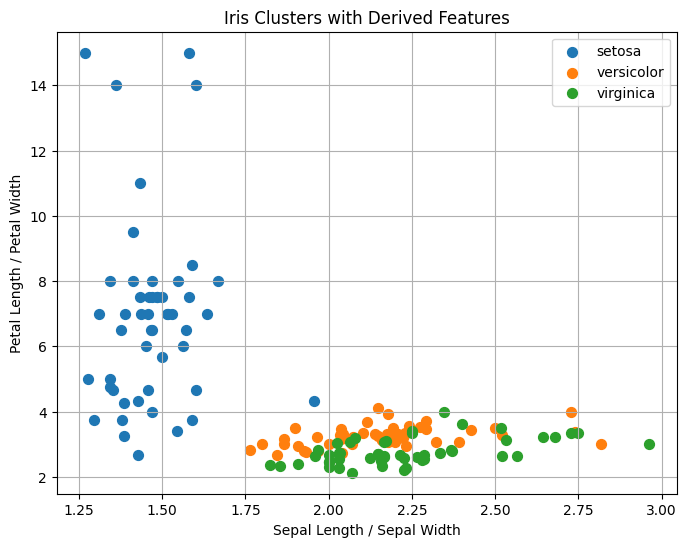

In [3]:
plt.figure(figsize=(8, 6))
for name, group in df.groupby('target_name'):
    plt.scatter(group['x1'], group['x2'], label=name, s=50)

plt.xlabel('Sepal Length / Sepal Width')
plt.ylabel('Petal Length / Petal Width')
plt.title('Iris Clusters with Derived Features')
plt.legend()
plt.grid(True)
plt.show()

### b)

Done in the Problem1.py file

In [10]:
from Problem1 import *

### c)

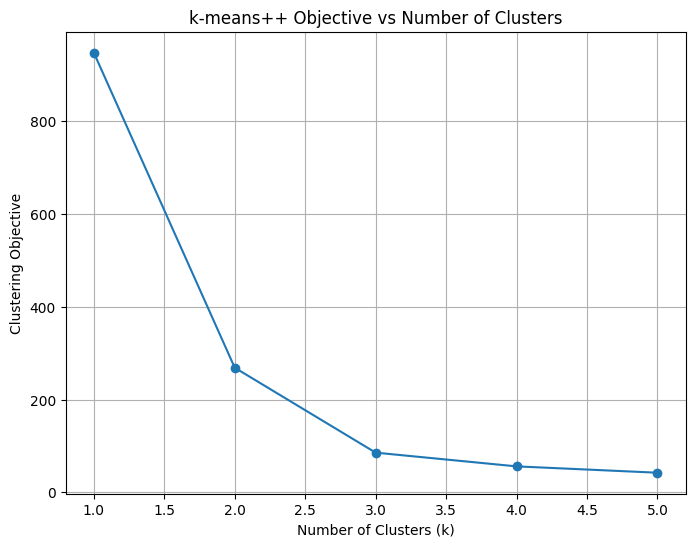

In [5]:
results = {}

for k in range(1, 6):
    best_obj = float('inf')
    for _ in range(50):
        centers = k_means_pp(df[['x1', 'x2']].values, k, max_iter=100)
        obj = compute_objective(df[['x1', 'x2']].values, centers)
        if obj < best_obj:
            best_obj = obj
    results[k] = best_obj

plt.figure(figsize=(8, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Clustering Objective')
plt.title('k-means++ Objective vs Number of Clusters')
plt.grid(True)
plt.show()

### d) Based on the above plot, decide the number of final clusters and justify your answer.


In this scenario is when we have to use the 'elbow' method that was discussed in class. Here we will look for where the graph of the objective starts to stop changing so drastically. We can see here that the graph derivative starts to flatten at about k=3. So we will determine that the best number of clusters for this data set is 3. This also makes sense with our prior knowledge as the iris dataset has 3 classes. 

### e)

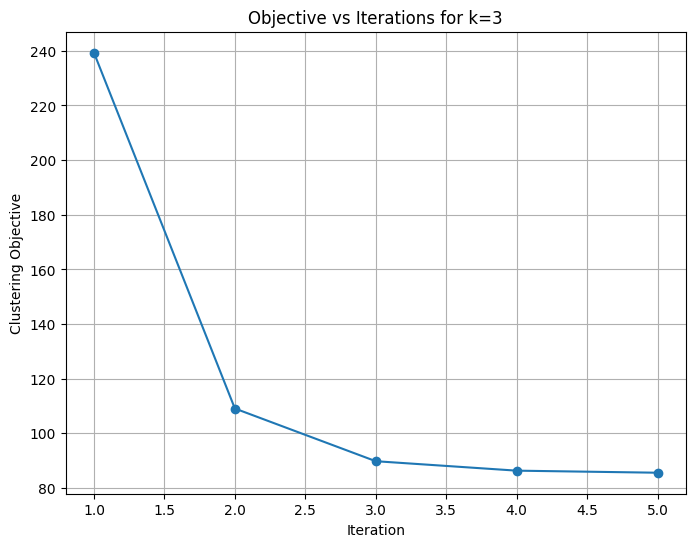

In [13]:
X_mod = df[['x1', 'x2']].values
k = 3  

objectives = []
centers = k_init(X_mod, k)
for _ in range(100):
    data_map = assign_data2clusters(X_mod, centers)
    new_centers = np.zeros_like(centers)
    for j in range(k):
        assigned_points = X_mod[data_map[:, j] == 1]
        if len(assigned_points) > 0:
            new_centers[j] = np.mean(assigned_points, axis=0)
        else:
            new_centers[j] = X_mod[np.random.randint(0, X_mod.shape[0])]
    obj = compute_objective(X_mod, centers)
    objectives.append(obj)
    if np.allclose(centers, new_centers):
        break
    centers = new_centers

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(objectives) + 1), objectives, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Clustering Objective')
plt.title('Objective vs Iterations for k=3')
plt.grid(True)
plt.show()

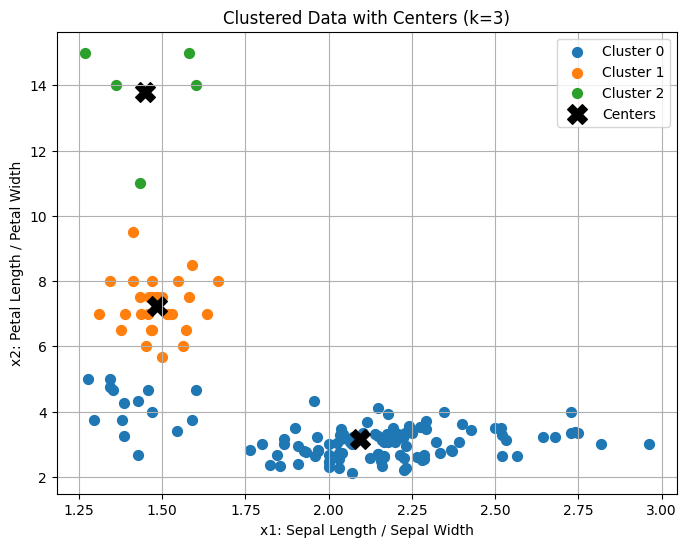

In [12]:
final_assignments = assign_data2clusters(X_mod, centers)

cluster_ids = np.argmax(final_assignments, axis=1)

plt.figure(figsize=(8, 6))
for cluster_id in range(k):
    cluster_points = X_mod[cluster_ids == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', s=50)

plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Centers')
plt.xlabel('x1: Sepal Length / Sepal Width')
plt.ylabel('x2: Petal Length / Petal Width')
plt.title('Clustered Data with Centers (k=3)')
plt.legend()
plt.grid(True)
plt.show()